<a href="https://colab.research.google.com/github/DayeonKim517/boostcourse_Data_Science_Projects-2024/blob/main/Week3_mission_LUKA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 라이브러리 로드

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [ ]:
# 폰트 설정

!pip install koreanize-matplotlib

import koreanize_matplotlib

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/corazzon/boostcourse-ds-510/master/data/NHIS_OPEN_GJ_2017.CSV.zip", encoding="cp949")

# 📌 Q1
연령대별 허리둘레에 대한 기술통계를 구하려고 합니다. 다음 제공되는 딕셔너리를 통해 연령대코드(5세단위)를 "연령대"로 만들고 아래와 같은 기술통계값을 구해주세요!

In [ ]:
age_code = {1: '0~4세',
 2: '5~9세',
 3: '10~14세',
 4: '15~19세',
 5: '20~24세',
 6: '25~29세',
 7: '30~34세',
 8: '35~39세',
 9: '40~44세',
 10: '45~49세',
 11: '50~54세',
 12: '55~59세',
 13: '60~64세',
 14: '65~69세',
 15: '70~74세',
 16: '75~79세',
 17: '80~84세',
 18: '85세+'}

In [ ]:
# 연령대코드(5세단위)를 연령대로 변환

df['연령대'] = df['연령대코드(5세단위)'].map(age_code)

In [ ]:
df.groupby(["연령대"])["허리둘레"].describe()

,count,mean,std,min,25%,50%,75%,max
연령대,,,,,,,,
20~24세,23244.0,75.152220,12.251781,47.5,67.5,73.4,81.0,999.0
25~29세,64898.0,77.704783,16.735734,48.0,69.0,76.5,84.2,999.0
30~34세,77517.0,81.089268,22.988111,49.0,72.0,80.1,88.0,999.0
35~39세,84621.0,82.094012,14.522095,9.2,75.0,82.0,89.0,999.0
40~44세,130912.0,80.488308,10.803098,42.1,73.0,80.0,87.0,999.0
45~49세,118357.0,80.822449,9.521622,40.0,74.0,81.0,87.0,137.0
50~54세,129833.0,81.062754,9.095438,6.5,75.0,81.0,87.0,142.0
55~59세,112175.0,81.799905,8.730398,32.0,76.0,82.0,87.5,139.0
60~64세,106491.0,82.722769,8.596176,0.0,77.0,83.0,88.0,137.0


# 📌Q2
 "음주여부", "흡연상태", "연령대코드(5세단위)", "성별코드"에 대한 상관계수를 구하고 시각화 해주세요.

* 다음의 결과가 나오도록 합니다. 이 때 그래프의 색상, 스타일 표현방식에 차이가 있더라도 상관계수값이 차이가 없다면 문제 없습니다.

In [ ]:
# 상관계수에 사용할 컬럼

columns = ['음주여부', '흡연상태',  '연령대코드(5세단위)', '성별코드']
columns

['음주여부', '흡연상태', '연령대코드(5세단위)', '성별코드']

In [ ]:
# 상관계수에 사용할 컬럼만 df_target 이라는 데이터프레임에 담은 뒤 상관계수를 구함

df_target = df[columns]
df_corr = df_target.corr()
df_corr

,음주여부,흡연상태,연령대코드(5세단위),성별코드
음주여부,1.000000,0.352014,-0.283296,-0.368630
흡연상태,0.352014,1.000000,-0.125714,-0.588491
연령대코드(5세단위),-0.283296,-0.125714,1.000000,0.080093
성별코드,-0.368630,-0.588491,0.080093,1.000000


<Axes: >

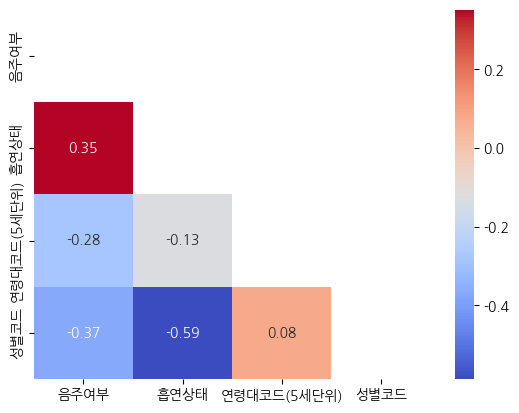

In [ ]:
mask = np.triu(np.ones_like(df_corr, dtype=bool))

sns.heatmap(df_corr, annot=True, fmt=".2f", cmap="coolwarm", mask=mask)

# 📌 Q3
흡연하는 사람과 음주하는 사람들의 수는 얼마나 차이가 있을까요?

* 건강보험에서 제공하고 있는 데이터는 용량을 줄이기 위해 대부분의 데이터를 숫자 형태로 제공하고 있습니다.  
replace 기능을 사용하면 딕셔너리의 값을 의미하는 문자 형태로 변경해 볼 수 있습니다.  
다음 제공되는 딕셔너리 값을 사용하여 숫자가 의미하는 문자 형태로 변경한 뒤  
전체 데이터에서 음주와 흡연에 대한 교차 테이블을 구해 각 해당 빈도수를 구하고 시각화 해주세요!

In [ ]:
# 흡연 1(피우지 않는다), 2(이전에 피웠으나 끊었다), 3(현재도 피우고 있다)
# 음주 0(마시지 않은다), 1(마신다)

smoke = {1 : "흡연안함", 2: "끊음", 3: "흡연중"}
drink = {0: "안마심", 1: "마심"}

In [ ]:
# 흡연과 음주 데이터를 문자 형태로 변환

df.loc[:, '흡연'] = df['흡연상태'].replace(smoke)
df.loc[:, '음주'] = df['음주여부'].replace(drink)

## replace()와 map() 차이
* replace()  
값이 존재하지 않아도 기존 값을 그대로 유지

* map()  
매핑 안된 값은 NAN 데이터로 만듦 → 모든 데이터가 매핑되도록 map 함수를 사용해야함

In [ ]:
df["흡연"].head()

,흡연
0,흡연중
1,흡연안함
2,흡연안함
3,흡연안함
4,흡연중


In [ ]:
df["음주"].head()

,음주
0,안마심
1,안마심
2,안마심
3,마심
4,안마심


In [ ]:
# 교차 테이블 생성

cross_tab = pd.crosstab(df['음주'], df['흡연'])
cross_tab

흡연,끊음,흡연안함,흡연중
음주,,,
마심,120779,213743,162166
안마심,55334,394503,52845


<Axes: xlabel='흡연', ylabel='count'>

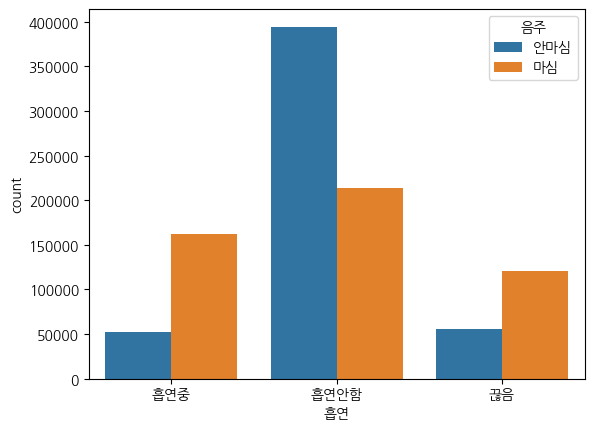

In [ ]:
# countplot 시각화

sns.countplot(data=df, x="흡연", hue="음주")

# 📌 Q4
체중이 120Kg 이상인 데이터를 찾아 "총콜레스테롤", "감마지티피" 값을 음주여부에 따라 산점도로 시각화해주세요!

* 체중이 120Kg 이 넘는다면 비만으로 건강관리가 필요합니다.  
120Kg 이상인 데이터를 찾아 "총콜레스테롤", "감마지티피" 값을 음주여부에 따라 산점도로 시각화해주세요!  
(이때 120Kg 도 포함되게 구합니다.) 그래프의 설정과 seaborn 버전에 따라 여백이나 회귀선의 시작과 끝점에 차이가 있을 수 있습니다.

In [ ]:
# 체중이 120Kg 이상인 데이터 필터링

df_filter = df[df["체중(5Kg 단위)"] >= 120]

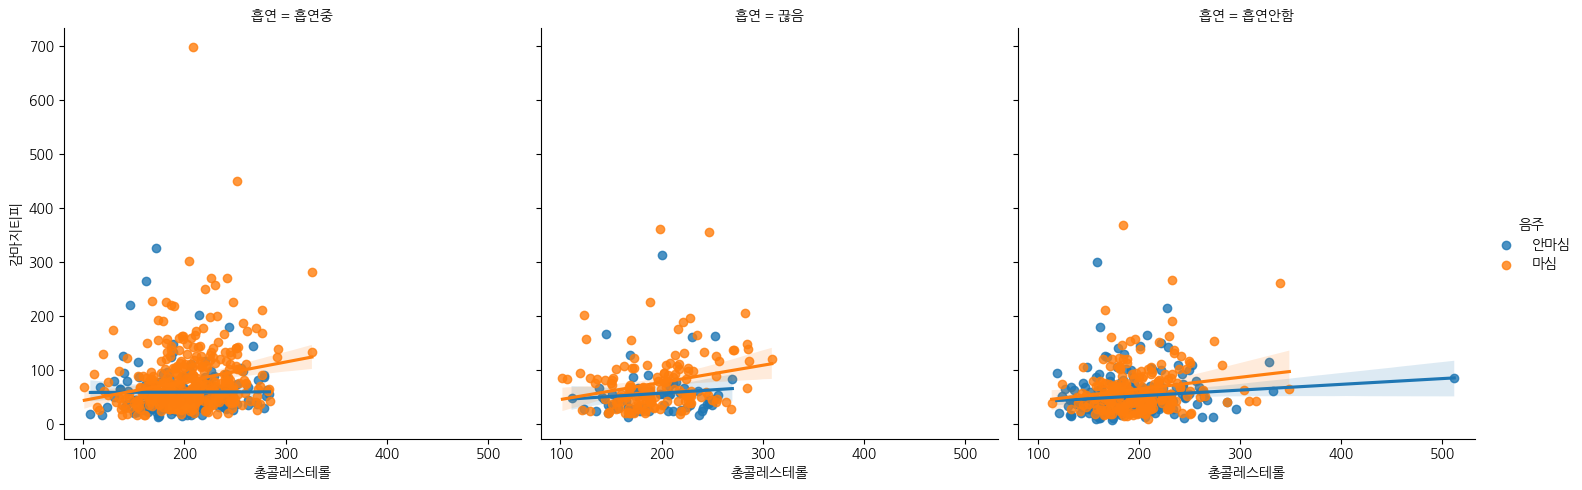

In [ ]:
# 음주 여부에 따른 총콜레스테롤과 감마지티피값의 산점도 시각화

sns.lmplot(data=df_filter, x="총콜레스테롤", y="감마지티피", hue="음주", col="흡연")

# 📌 Q5
연령대별로 시력은 얼마나 차이가 날까요? 연령대, 성별 좌우 평균 시력을 시각화 해주세요!

* 시력은 0.1~2.5 사이의 값으로 표기하며 0.1 이하의 시력은 0.1, 실명은 9.9로 표기합니다.

* 실명인 데이터를 평균에 포함하게 되면 시력에 대한 평균을 제대로 구하기 어렵습니다.  
실명 데이터를 제외하고 연령대, 성별에 따른 평균 좌우 시력을 구해주세요!

* 서브플롯으로 시각화하여 표현해 주고 matplotlib 에 대한 사용법은 다음의 영상도 함께 참고해 주세요! (https://www.youtube.com/watch?v=ZTRKojTLE8M)

* 시각화 예시는 참고사항으로 스타일이나 폰트 구성이 달라도 연령대, 성별 좌우평균시력을 시각화 하면 됩니다.

In [ ]:
# 실명데이터 제외

df_eyesight = df[(df["시력(좌)"] != 9.9) & (df["시력(우)"] != 9.9)]

In [ ]:
# 연령대와 성별에 따른 좌우 시력의 평균 계산

avg_eyesight = df_eyesight.groupby(["연령대", "성별코드"])[["시력(좌)", "시력(우)"]].mean()

<Axes: xlabel='시력(우)', ylabel='연령대'>

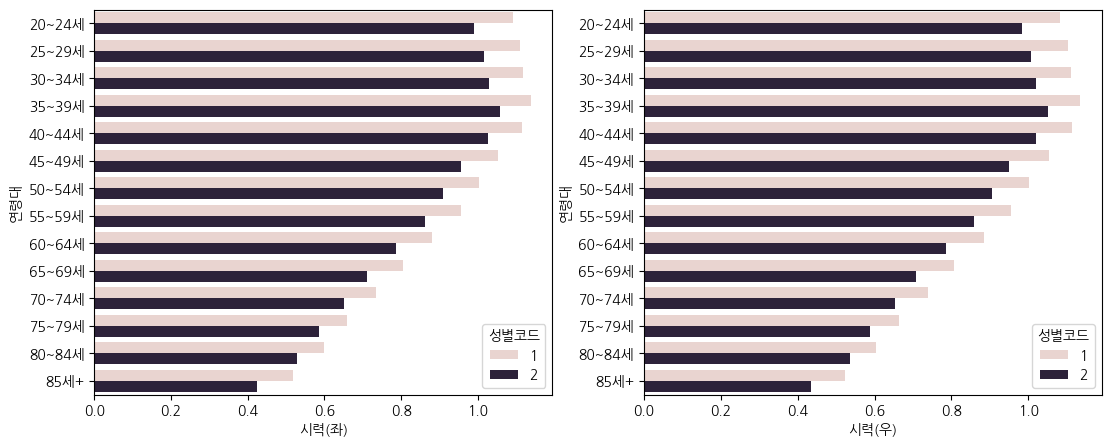

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(13, 5))

sns.barplot(data=avg_eyesight, x="시력(좌)", y="연령대", hue="성별코드", ax=axes[0])
sns.barplot(data=avg_eyesight, x="시력(우)", y="연령대", hue="성별코드", ax=axes[1])

## Seaborn의 sns.barplot에서 막대 그래프의 방향

어떤 데이터를 x와 y 매개변수에 전달하느냐에 따라 결정됨

* 수직 막대 그래프  
만약 범주형 데이터를 x 매개변수에, 수치형 데이터를 y 매개변수에 전달하면 막대 그래프는 수직으로 그려짐

* 수평 막대 그래프  
만약 범주형 데이터를 y 매개변수에, 숫자형 데이터를 x 매개변수에 전달하면 막대 그래프는 수평으로 그려짐

* 요약  
수직 막대 그래프: x = 범주형 데이터, y = 숫자형 데이터.  
수평 막대 그래프: x = 숫자형 데이터, y = 범주형 데이터.
